# Machine Learning

##  Classification  

In machine learning, classification is related to supervised learning approaches in which the algorithm fits from an annotated set of data. This learning phase is followed by a validation phase to evaluate the classification model through several metrics. Once the model is correctly validated, a generalization phase is used to classify new data.

The given dataset was produced by the World Health Organization. It pooled the evolution of 20 features for 15 years and among numerous countries. One of the goals of this TP2 is to visualize feature space and try to predict the development of countries.

**Objectives:**
- Visualize the feature space
- Discuss the feasibility of feature space separation
- Normalize the datasets
- Train a K-NN, a decision tree, a random forest and a SVM
- Visualize the decision boundary for each method
- Create a test dataset
- Compute AUC scores on a evaluation dataset
- Tune hyperparameters
- Visualize the modification of decision boundary for each tuning
- Discuss the limits of the four implementations

This TP has different **checkpoints**. Please call your teacher at the end of each checkpoint to validate your work. Any non validated work won't be taken into account in the notation


## STEP 1: Feature space visualization

You will work on the WHO dataset in the year 2000. This first step consists of choosing two features to perform a classification.

**TO DO 1.1**

If you are using jupyter-notebook, execute the following cell :

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

df = pd.read_csv("Life_Expectancy_Data.csv")
df = df.dropna()
df.info()

df1 = df[(df.Year == 2000)]

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life_expectancy                  1649 non-null   float64
 4   Adult_mortality                  1649 non-null   float64
 5   Infant_deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   Percentage_expenditure           1649 non-null   float64
 8   Hepatitis_B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10  BMI                              1649 non-null   float64
 11  Under-five_deaths                1649 non-null   int64  
 12  Polio                    

<module 'matplotlib.pyplot' from '/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

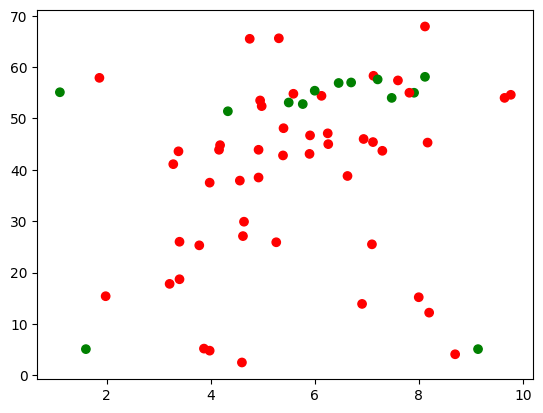

In [94]:
df_X = df1[['Total_expenditure', 'BMI']]
df_Status = df1[['Status']]

df_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

**QUESTION 1**

Why was the label status binarized?

Is this feature space easily separable? Justify your response

L’étiquette de statut a été binarisée car elle ne comporte que deux valeurs, 'Developed' et 'Developping', pouvant être respectivement converties en 1 et 0. Cette transformation en valeurs numériques est essentielle car les étiquettes sous forme de chaînes de caractères ne peuvent pas être directement traitées dans les algorithmes de classification. Par ailleurs, un chevauchement des points verts et rouges est observé, compliquant la séparation des classes dans l’espace de représentation. La binarisation optimise donc les algorithmes de classification en facilitant le calcul des coûts, ce qui n'est pas possible avec des chaînes de caractères.

**TO CODE 1.2**

Plot Total expenditure against Schooling

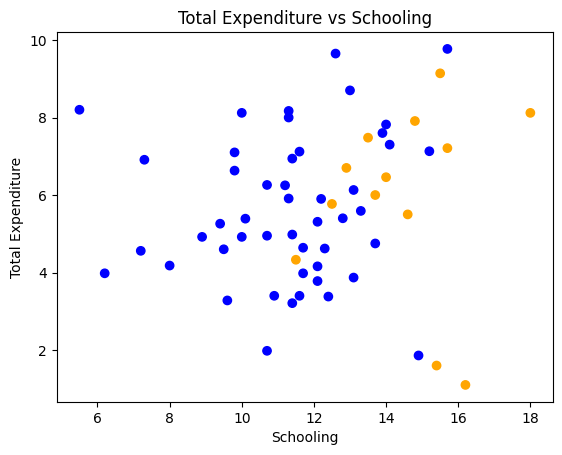

In [95]:
df_X = df1[["Schooling", "Total_expenditure"]]
np1 = df_X.to_numpy()
df_Status = df1[["Status"]]
df_Y = df_Status . replace ( [ "Developing" , "Developed"] , [ 0 , 1 ] )
plt.scatter(np1[:, 0], np1[:, 1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(["blue", "orange"]))
plt.xlabel("Schooling")
plt.ylabel("Total Expenditure")
plt.title("Total Expenditure vs Schooling")
plt.show()

**TO CODE 1.3**

Plot Life Expectancy against Schooling

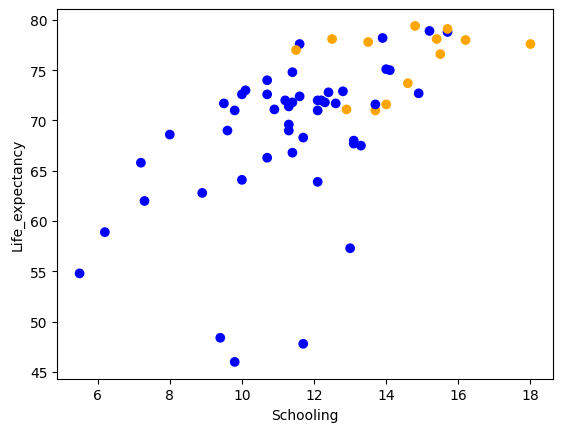

In [96]:
df_X = df1[["Schooling","Life_expectancy"]]
np1 = df_X.to_numpy()
plt.scatter(np1[:, 0], np1[:, 1], c=np.squeeze(df_Y.to_numpy()),cmap=matplotlib.colors.ListedColormap(["blue", "orange"]))
plt.ylabel("Life_expectancy")
plt.xlabel("Schooling")
plt.show()

**QUESTION 2**

What would be the best features to use? Justify your response

Use those features as df_X.

Les caractéristiques les plus pertinentes à utiliser sont Life_expectancy et Schooling, car elles permettent de mieux séparer les données en deux ensembles distincts. Cela simplifie la définition des frontières de décision, facilitant ainsi la classification.

In [98]:
df_X = df1[['Life_expectancy', 'Schooling']]
print(df_X)

      Life_expectancy  Schooling
15               54.8        5.5
31               72.6       10.7
111              72.0       11.2
143              78.1       15.4
239              68.0       13.1
...               ...        ...
2696             74.0       10.7
2745             67.5       13.3
2825             75.1       14.0
2857             69.0        9.6
2937             46.0        9.8

[61 rows x 2 columns]


## Checkpoint : 1
Call your teacher to validate the first step of the TP

## STEP 2: Dataset normalization

To classify, the values in the learning dataset must be normalized (aka between 0 and 1). This normalization can be performed through various ways.

**TO CODE 2.1**

Normalize df_X. This normalization should perfectly frame the data (aka the minimum and the maximum values of each feature should be respectively 0 and 1).

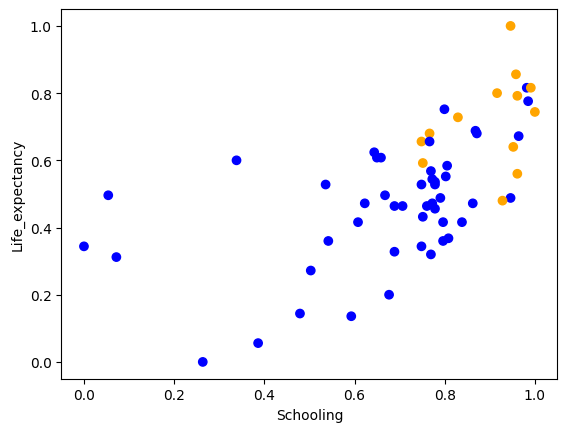

In [99]:
df_X_norm=(df_X-df_X.min())/(df_X.max()-df_X.min())
np_X_norm=df_X_norm.to_numpy()
np_Y=df_Y.to_numpy()
plt.ylabel("Life_expectancy")
plt.xlabel("Schooling")
plt.scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np.squeeze(df_Y.to_numpy()), cmap=matplotlib.colors.ListedColormap(["blue", "orange"]))

**TO DO 2.2**

Each following cell performs a learning step and an AUC scores computation. For each classifier, several parameters have been chosen.

(61, 2)


/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


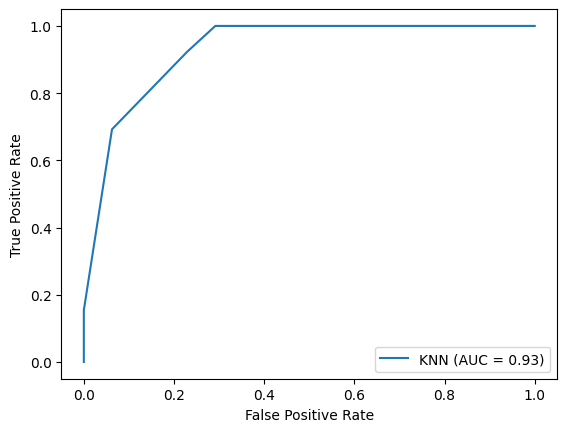

In [100]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(df_X_norm)
print(np_Y_pred.shape)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='KNN')
display.plot()
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


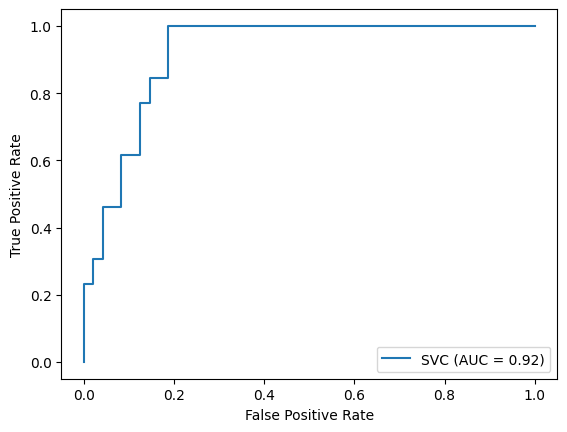

In [101]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear', probability=True)
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='SVC')
display.plot()
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


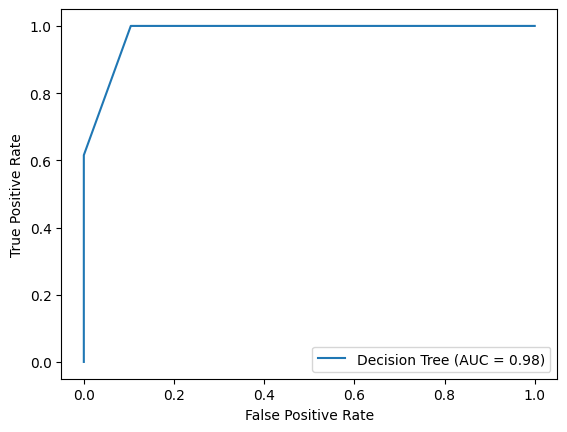

In [102]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Decision Tree')
display.plot()
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


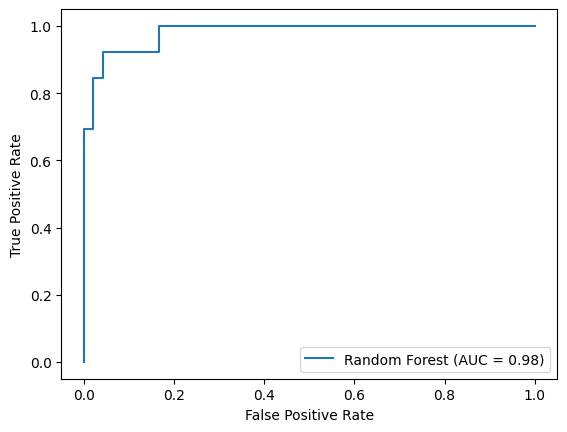

In [103]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3)
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Random Forest')
display.plot()
plt.show()

**QUESTION 3**

Identify each used classifiers and specify the used parameters

Describe and explain the results obtained for each ROC curve. What is the relation between the AUC and the ROC curve ? According to the ROC curve, which model is the best if we want to maximize the sensitivity ? And if we want to maximize the specificity ? Compare those results with the AUC. 

L'AUC (aire sous la courbe) fournit un équilibre optimal entre sensibilité et spécificité. Pour maximiser la classification correcte d'un maximum de points (c'est-à-dire maximiser la sensibilité), il est souhaitable d'avoir une AUC élevée. En revanche, pour minimiser les erreurs (en augmentant la spécificité), une AUC plus modérée peut suffire. Dans notre cas, le RandomForestClassifier est performant pour la sensibilité, tandis que le SVC est plus adapté pour la spécificité.

For a two-classes problem, a decision boundary is a hypersurface which splits the feature space between two sets (for each class). Then this surface is composed of all the equiprobability points in the feature space.

**TO DO 2.3**

Plot the decision boundary with df_X for each classifiers

<module 'matplotlib.pyplot' from '/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/matplotlib/pyplot.py'>

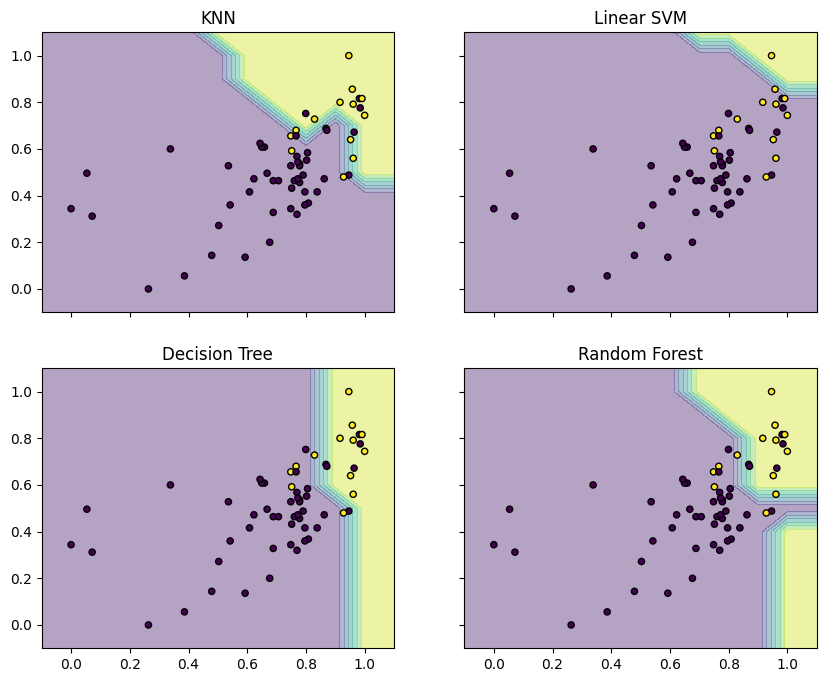

In [104]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt


**QUESTION 4**

What is the main problem of the classification step with this dataset?

In your opinion, which classifier is better suited for this classification task? Justify your response

Le principal défi de la classification des données réside dans le déséquilibre des classes, ce qui complique la séparation efficace des données par les classifieurs. Parmi les différents modèles, le classificateur KNN est le mieux adapté à cette tâche, car il respecte la distribution des points et maximise le nombre de points correctement classés par rapport aux autres classificateurs. 

## Checkpoint : 2
Call your teacher to validate the step 2

## STEP 3: Biases correction and model tuning

In this part, you will focus on improving the AUC scores of the four methods.

Firstable, you will weigh the classes to balance the classifier response. Then you will tune various hyperparameters.

**TO CODE 3.1**

Compute the percentage of "Developed" class in df_Y.

In [105]:
developed_count = (df_Y == 1).sum()

developed_percentage = (developed_count / len(df_Y)) * 100
print(f" Le pourcentage de 'Developed' est : {developed_percentage:}%")



 Le pourcentage de 'Developed' est : Status    21.311475
dtype: float64%


SVM, Decision Tree and Random Forest algorithms have a parameter named:

```
class_weight
```
Here is a extract from sklearn documentation:

**class_weight** dict, list of dict or “balanced”, default=None

Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data.


**QUESTION 5**

What would be the weight values for each class?

Le poids correspond à l'inverse de la probabilté uniforme, c'est à dire : Poids "Developed" : 100/21.31=4,69 Poids "Developing" : 100/(100−21.31)=1,27 


**TO CODE 3.2**

Balance SVM, Decision Tree and Random Forest classifiers and plot the decision boundaries

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


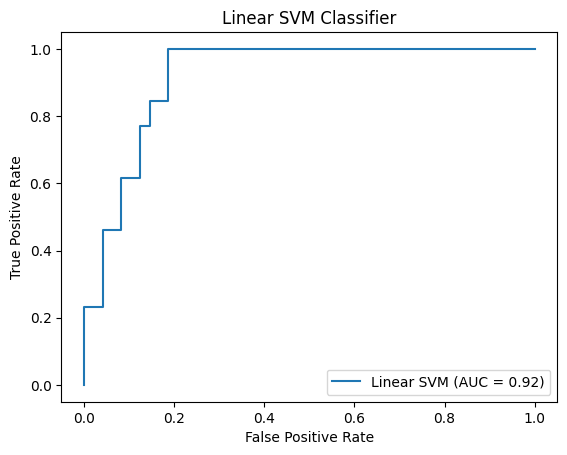

In [106]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='linear', probability=True, class_weight='balanced') 
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Linear SVM')
display.plot()
plt.title("Linear SVM Classifier")
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


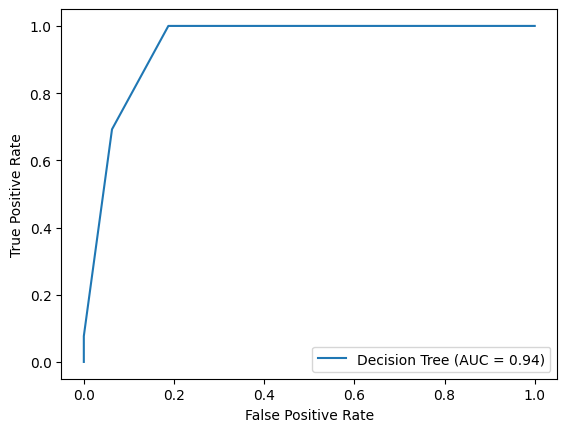

In [107]:
clf3 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Decision Tree')
display.plot()
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


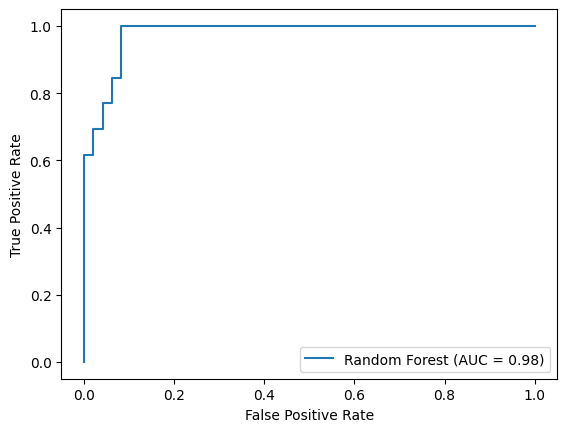

In [108]:
clf4 = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Random Forest')
display.plot()
plt.show()

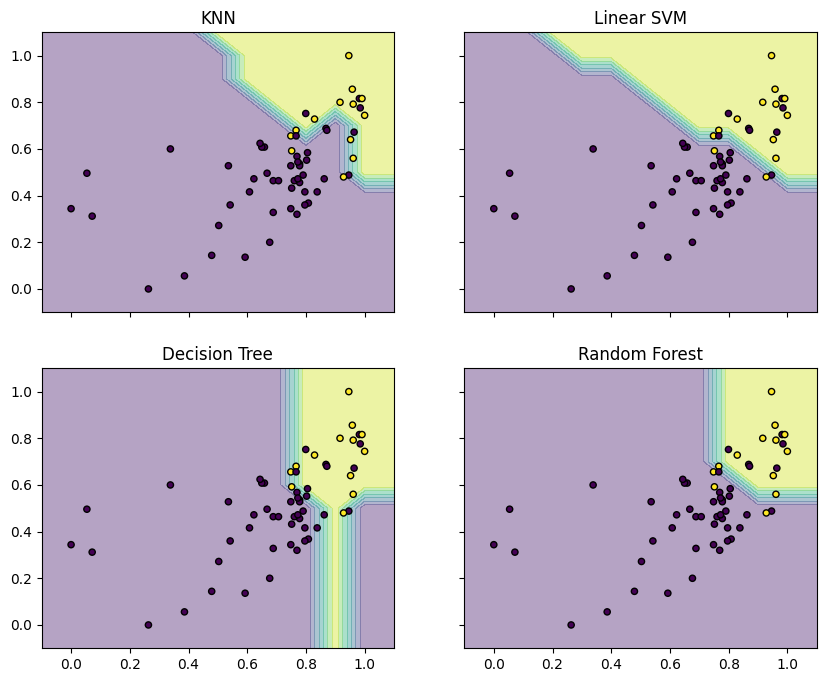

In [109]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'Linear SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

**TO CODE 3.3**

Compute the new AUC scores

Les scores AUC sont affichés sur les différents graphiques.

**QUESTION 6**

Why did the AUC scores increase or **decrease**? How do you interpret it?

Pour **SVC** :
L'absence de changement dans l'AUC indique que le modèle était déjà bien ajusté.

Pour **Decision Tree** :
La diminution de l'AUC peut être due à un sur-apprentissage sur la classe minoritaire (overfitting) après l'équilibrage des classes.

Pour **Random Forest**:
L'augmentation de l'AUC suggère que le rééquilibrage a permis au modèle d'améliorer sa capacité à distinguer entre les classes.

In your opinion, has the classe balance improved the classification?

Oui, l'équilibrage des classes a amélioré le classement dans le cas de Random Forest, comme l'indique l'augmentation de l'AUC. 
Cependant, il a eu un effet négatif sur le Decision Tree, montrant que l'équilibrage ne garantit pas toujours une amélioration des performances.

Let's focus on the SVM classifier.

Sklearn allows multiple kernels.

Here is an extract of the documentation:

**kernel** {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’

Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).


**TO CODE 3.4**

Test the gaussian and the polynomial kernels with balanced classes and plot the decision boundaries

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


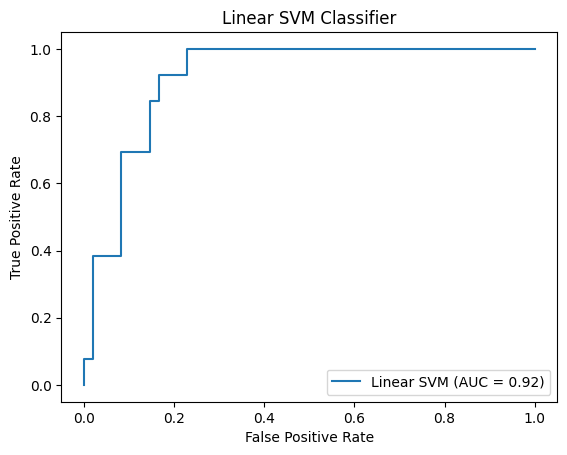

In [110]:
from sklearn.svm import SVC

clf7 = SVC(C=2.0, kernel='rbf', probability=True, class_weight='balanced') 
clf7.fit(np_X_norm, np_Y)

np_Y_pred = clf7.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Linear SVM')
display.plot()
plt.title("Linear SVM Classifier")
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


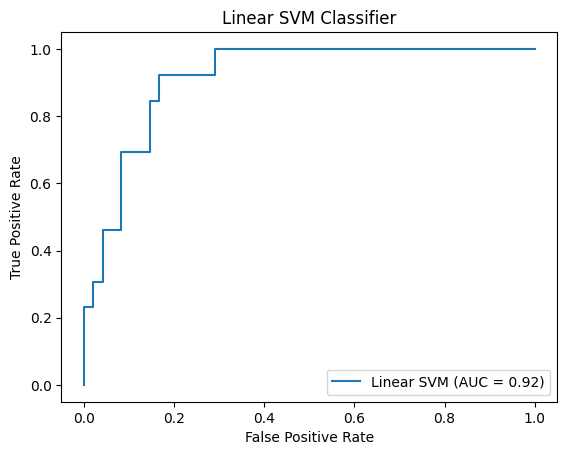

In [111]:
from sklearn.svm import SVC

clf8 = SVC(C=2.0, kernel='poly', probability=True, class_weight='balanced') 
clf8.fit(np_X_norm, np_Y)

np_Y_pred = clf8.predict_proba(df_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Linear SVM')
display.plot()
plt.title("Linear SVM Classifier")
plt.show()

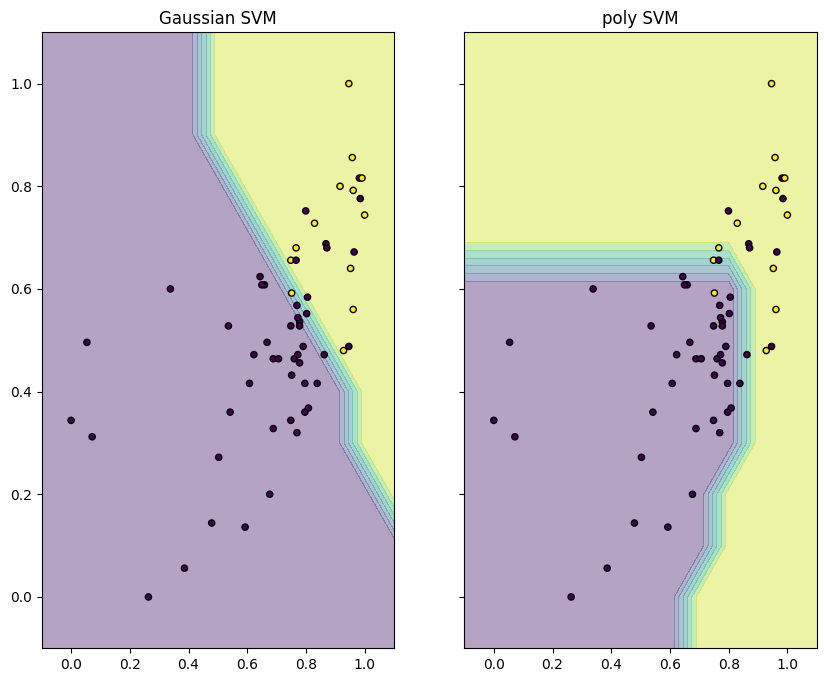

In [112]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip([0, 1],
                        [clf7, clf8],
                        ['Gaussian SVM', 'poly SVM']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx].set_title(tt)

plt.show()

**QUESTION 7**

In your opinion, which is the best kernel for this dataset? Justify your response

SVM Gaussien :
Ce modèle montre une frontière de décision qui capture mieux les relations entre les variables. Il soutient l'hypothèse que l'accès à l'éducation influence positivement l'espérance de vie.

SVM Polynomial :
La frontière de décision est trop élargie, entraînant des classifications erronées. Pour les valeurs de scolarité faibles, il indique des espérances de vie élevées, ce qui contredit l'hypothèse.

Le SVM gaussien est le modèle le plus approprié pour classifier ces données.

**BONUS**

Tune the parameters for Decision Tree and Random Forest algorithms and plot the decision boundaries

## Checkpoint : 3
Call your teacher to validate step 3

## STEP 4: An evaluation dataset

This part is to test the generalization of your models.

You trained several classifiers on two features extracted from the year 2000.

**TO CODE 4.1**

Apply your models on the year 2012

**QUESTION 8**

Are your models still relevant in the year 2012?

          Country  Year      Status  Life_expectancy  Adult_mortality  \
3     Afghanistan  2012  Developing             59.5            272.0   
19        Albania  2012  Developing             76.9             86.0   
35        Algeria  2012  Developing             75.1            113.0   
51         Angola  2012  Developing             56.0            358.0   
83      Argentina  2012  Developing             75.9             12.0   
...           ...   ...         ...              ...              ...   
2813      Uruguay  2012  Developing             76.5            118.0   
2829   Uzbekistan  2012  Developing             68.8            184.0   
2845      Vanuatu  2012  Developing             71.4            138.0   
2909       Zambia  2012  Developing             59.2            349.0   
2925     Zimbabwe  2012  Developing             56.6            429.0   

      Infant_deaths  Alcohol  Percentage_expenditure  Hepatitis_B  Measles  \
3                69     0.01               78

Text(0.5, 1.0, 'Life expectancy with Schooling\xa0(normalized)')

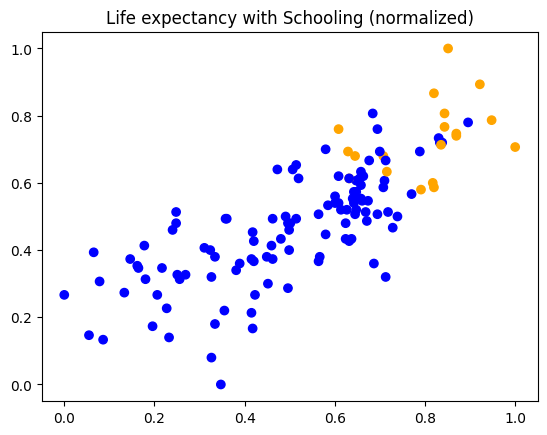

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Life_Expectancy_Data.csv")

df = df.dropna()

df3 = df[(df.Year == 2012)]
print(df3)

df3_X = df3[['Life_expectancy', 'Schooling']]
df_Status = df3[['Status']]

df3_Y = df_Status.replace(['Developing', 'Developed'], [0, 1])
df3_X_norm = df3_X.copy()

df3_X_norm = (df3_X - df3_X.min())/(df3_X.max() - df3_X.min())
np_X_norm = df3_X_norm.to_numpy()
np_Y = df3_Y.to_numpy()

plt.scatter(np_X_norm[:,0], np_X_norm[:,1], c=np.squeeze(np_Y), cmap=matplotlib.colors.ListedColormap(['blue', 'orange']))



plt.title("Life expectancy with Schooling (normalized)")

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


(129, 2)


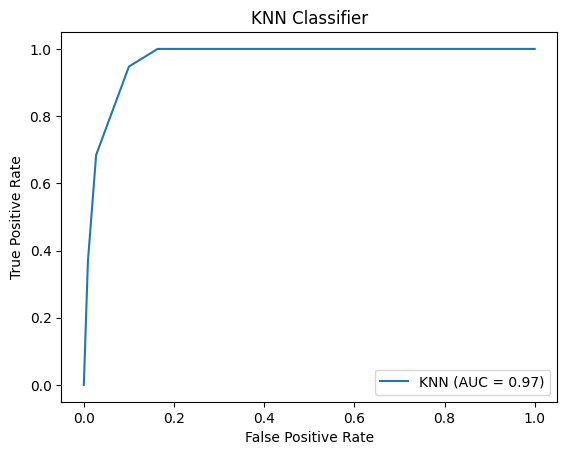

In [114]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

clf1 = KNeighborsClassifier(n_neighbors=5)
clf1.fit(np_X_norm, np_Y)

np_Y_pred = clf1.predict_proba(df3_X_norm)
print(np_Y_pred.shape)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='KNN')
display.plot()
plt.title("KNN Classifier")
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


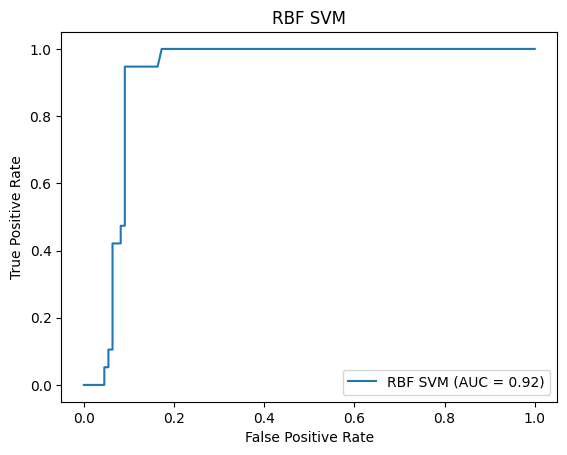

In [115]:
from sklearn.svm import SVC

clf2 = SVC(C=2.0, kernel='rbf', probability=True, class_weight='balanced')
clf2.fit(np_X_norm, np_Y)

np_Y_pred = clf2.predict_proba(df3_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='RBF SVM')

display.plot()
plt.title("RBF SVM")
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


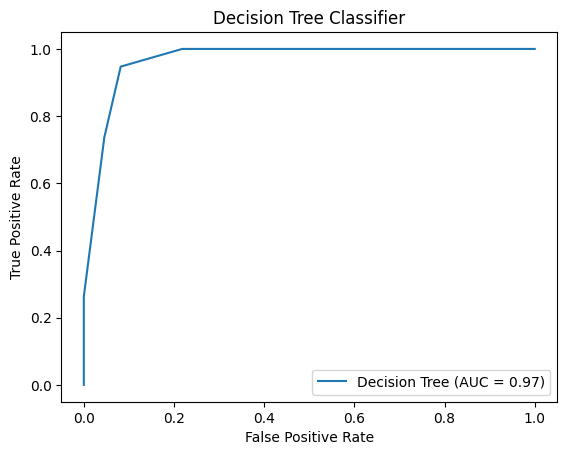

In [116]:
from sklearn.tree import DecisionTreeClassifier

clf3 = DecisionTreeClassifier(max_depth=3, class_weight='balanced')
clf3.fit(np_X_norm, np_Y)

np_Y_pred = clf3.predict_proba(df3_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Decision Tree')

display.plot()
plt.title("Decision Tree Classifier")
plt.show()

/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/etc/jupyterhub/kernel/2A_ML_env/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


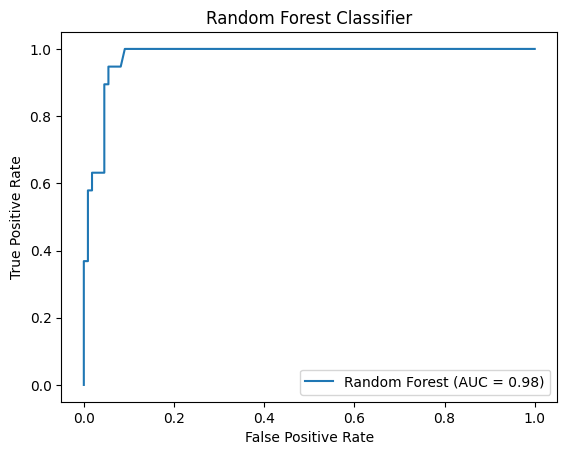

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf4 = RandomForestClassifier(n_estimators=100, max_depth=3, class_weight='balanced')
clf4.fit(np_X_norm, np_Y)

np_Y_pred = clf4.predict_proba(df3_X_norm)

fpr, tpr, thresholds = metrics.roc_curve(np_Y, np_Y_pred[:,1])
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='Random Forest')

display.plot()
plt.title("Random Forest Classifier")
plt.show()

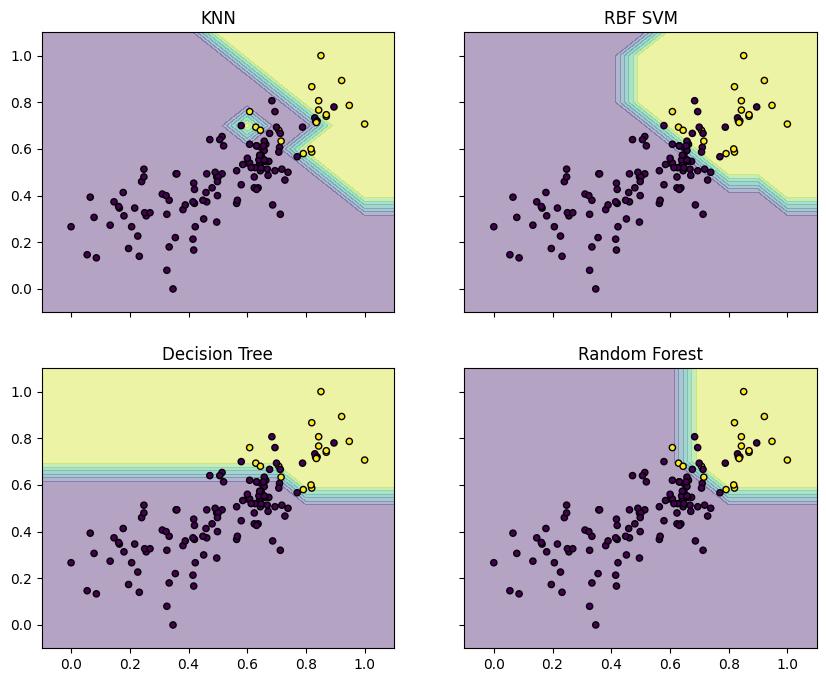

In [118]:
from itertools import product

x_min, x_max = np_X_norm[:, 0].min() - 0.1, np_X_norm[:, 0].max() + 0.1
y_min, y_max = np_X_norm[:, 1].min() - 0.1, np_X_norm[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, clf4],
                        ['KNN', 'RBF SVM', 'Decision Tree', 'Random Forest']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np_X_norm[:, 0], np_X_norm[:, 1], c=np_Y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()


On observe que certains modèles demeurent fiables par rapport à ceux de l'année 2000. En particulier, le modèle gaussien de SVM se distingue par sa cohérence, tandis que le modèle KNN a perdu en précision par rapport à ses performances antérieures. Il est à noter que ce dernier a engendré une enclave en plus d'une surface de décision, ce qui nuit à l'efficacité de l'algorithme de classification.